In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df = pd.read_csv('Customer Churn data.csv', encoding = "unicode_escape")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing Blanks as 0 as tenure as 0 and no total charges are recorded

In [40]:
df["TotalCharges"] =df["TotalCharges"].replace(" ","0")
df["TotalCharges"] =df["TotalCharges"].astype("float")

In [41]:
df.isnull().sum().sum()

0

In [42]:
df.duplicated().sum()

0

In [43]:
df["customerID"].duplicated().sum()

0

In [46]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

 #converted 0 and 1 values of seniorcitizen column to yes or no to make it easier to understand 

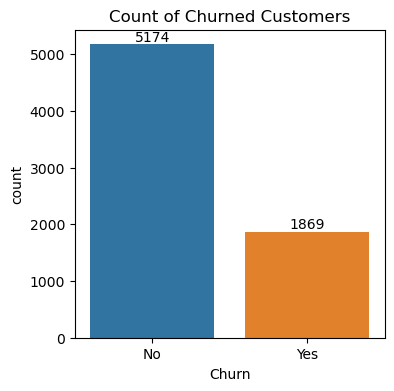

In [78]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Churned Customers")
plt.show()

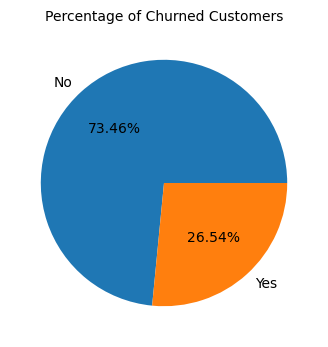

In [70]:
plt.figure(figsize=(4,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb["Churn"],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

#from the give pie chart we can conslude that 26.54% of our customers have churned out 
#now let's find the reason behind it 

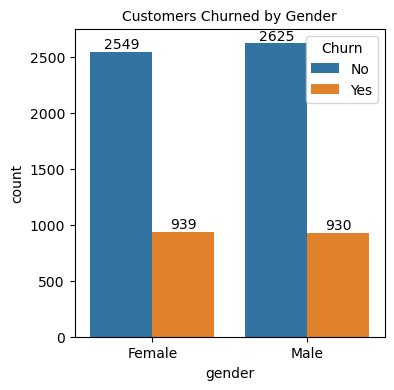

In [124]:
plt.figure(figsize = (4,4))
plt.title("Customers Churned by Gender", fontsize = 10)
ax=sns.countplot(x = "gender", data = df, hue = "Churn")
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[0])
plt.show()

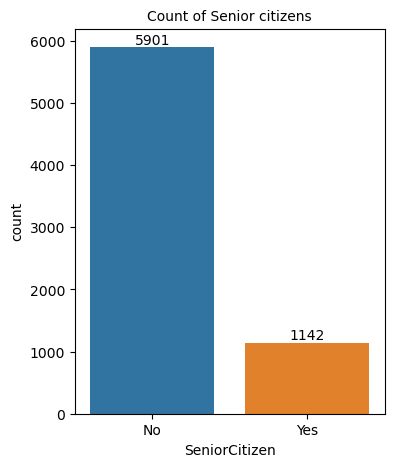

In [94]:
plt.figure(figsize = (4,5))
plt.title("Count of customers by Senior citizens", fontsize = 10)
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.show()

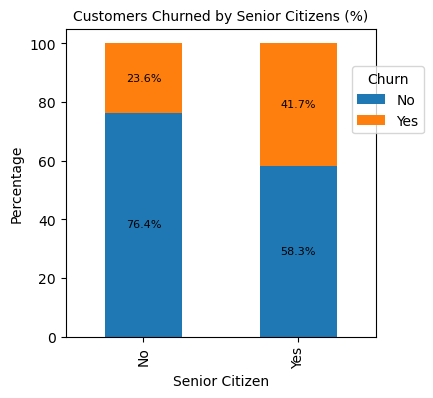

In [101]:
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot stacked bar
ax = ct.plot(kind='bar', stacked=True, figsize=(4,4), color=('#1f77b4',"#ff7f0e"))

plt.title("Customers Churned by Senior Citizens (%)", fontsize=10)
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", bbox_to_anchor = (0.9,0.9))

# Add percentage labels
for i, row in enumerate(ct.values):
    cum_sum = 0
    for j, val in enumerate(row):
        ax.text(i, cum_sum + val/2, f"{val:.1f}%", ha='center', va='center', color='black', fontsize=8)
        cum_sum += val

plt.show()

#comparitive a greatest number of people in Senior Citizen category have churned out. 

C:\Users\Akram\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


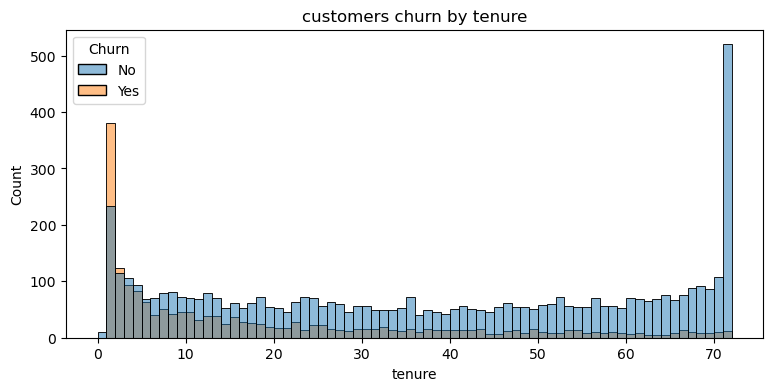

In [111]:
plt.figure(figsize = (9,4))
plt.title("customers churn by tenure")
sns.histplot(x="tenure", data = df,bins = 72, hue = "Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned out 

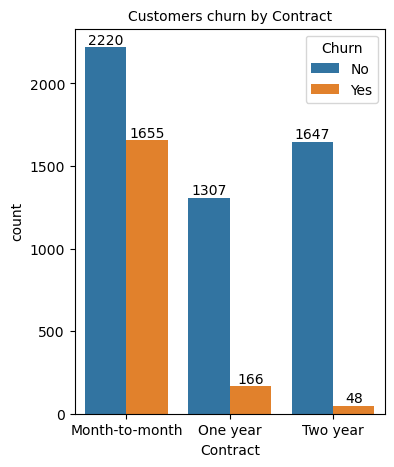

In [122]:
plt.figure(figsize = (4,5))
plt.title("Customers churn by Contract", fontsize = 10)
ax = sns.countplot(x = "Contract", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#people who have mpnth to month contract are likely to churn then from those who have 1 or 2 years of contract.

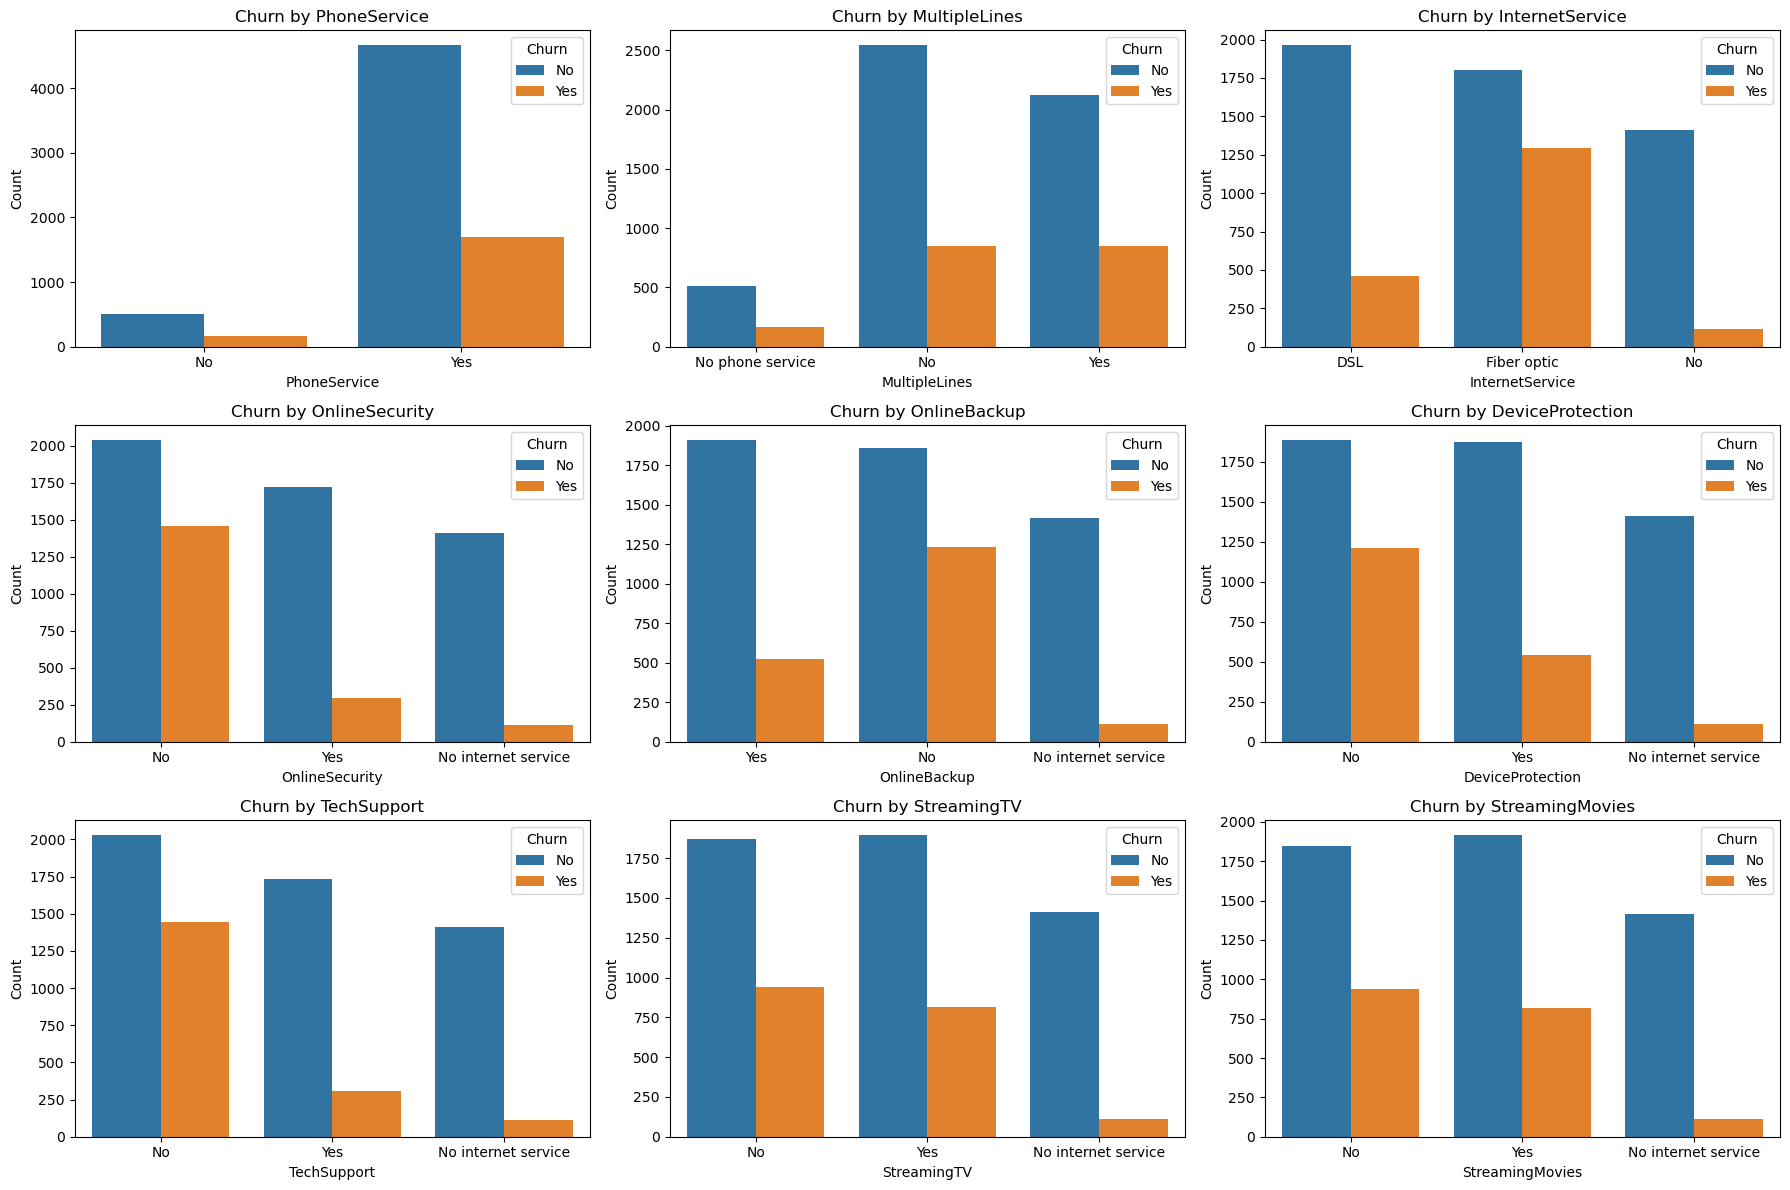

In [116]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Setup grid for subplots (3 rows x 3 cols for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # flatten to easily loop over

for i, col in enumerate(service_cols):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    axes[i].set_title(f"Churn by {col}", fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Count", fontsize=10)
    axes[i].legend(title="Churn", loc="upper right")

plt.tight_layout()
plt.show()


#Customers with no internet-related services (OnlineSecurity, TechSupport, OnlineBackup, etc.) show a noticeably higher churn rate compared to those who subscribe. Streaming services (TV & Movies) don’t strongly prevent churn, but value-added services like TechSupport and OnlineSecurity clearly reduce the likelihood of customers leaving.

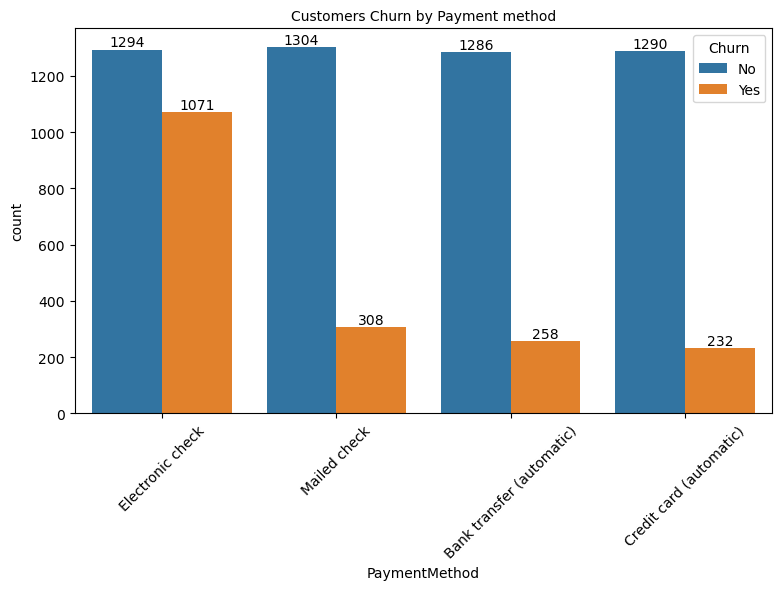

In [128]:
plt.figure(figsize = (9,5))
plt.title("Customers Churn by Payment method", fontsize = 10)
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method